## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df = pd.read_csv('QueryResults.csv')
df.columns = ['DATE', 'TAG', 'POSTS']

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,163
3,2008-08-01 00:00:00,c,83
4,2008-08-01 00:00:00,python,122


In [ ]:
df.tail()

,DATE,TAG,POSTS
2225,2021-12-01 00:00:00,perl,111
2226,2021-12-01 00:00:00,ruby,449
2227,2021-12-01 00:00:00,r,4076
2228,2021-12-01 00:00:00,go,835
2229,2021-12-01 00:00:00,swift,1830


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
df.shape

(2230, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

DATE     2230
TAG      2230
POSTS    2230
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,39262
c,371327
c#,1514324
c++,749095
delphi,48990
go,58341
java,1817869
javascript,2314208
perl,66243


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,161,161
c,161,161
c#,162,162
c++,161,161
delphi,161,161
go,146,146
java,161,161
javascript,161,161
perl,161,161


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [ ]:
type(df['DATE'][1])

str

In [ ]:
print(pd.to_datetime(df['DATE'][1]))
type(pd.to_datetime(df['DATE'][1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df.DATE = pd.to_datetime(df['DATE'])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,83
4,2008-08-01,python,122


## Data Manipulation



In [ ]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [ ]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2021-08-01,166.0,1620.0,5762.0,3479.0,141.0,785.0,7955.0,17049.0,118.0,4589.0,23134.0,4575.0,508.0,2198.0
2021-09-01,197.0,1805.0,5769.0,3922.0,143.0,661.0,7816.0,16710.0,114.0,4324.0,21987.0,4332.0,507.0,1938.0
2021-10-01,224.0,2212.0,6075.0,4101.0,150.0,763.0,7835.0,16296.0,131.0,4313.0,23062.0,4758.0,482.0,1856.0
2021-11-01,313.0,2349.0,6447.0,4193.0,151.0,717.0,8348.0,15946.0,81.0,4171.0,23569.0,4645.0,450.0,1776.0
2021-12-01,331.0,2412.0,6256.0,4161.0,167.0,835.0,8276.0,16440.0,111.0,4275.0,23743.0,4076.0,449.0,1830.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
reshaped_df.shape

(162, 14)

In [ ]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [ ]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,163.0,14.0,NaN,222.0,163.0,28.0,160.0,122.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,502.0,452.0,1.0,159.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [ ]:
reshaped_df.count()

TAG
assembly      161
c             161
c#            162
c++           161
delphi        161
go            146
java          161
javascript    161
perl          161
php           161
python        161
r             159
ruby          161
swift         153
dtype: int64

In [ ]:
reshaped_df.fillna(0, inplace=True)

In [ ]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,163.0,14.0,0.0,222.0,163.0,28.0,160.0,122.0,0.0,71.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1990.0,810.0,112.0,0.0,1154.0,726.0,127.0,615.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,579.0,97.0,502.0,452.0,1.0,159.0,0.0


In [ ]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

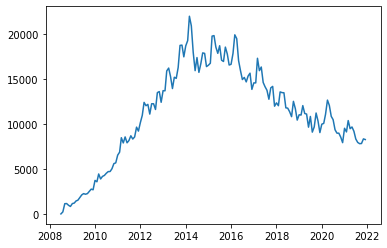

In [ ]:
plt.plot(reshaped_df.index, reshaped_df['java'])

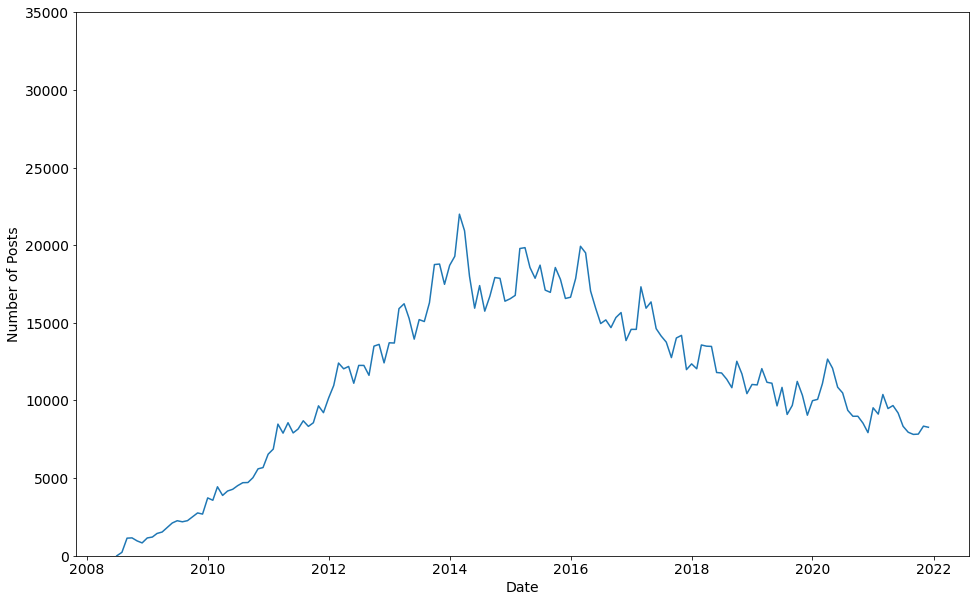

In [ ]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

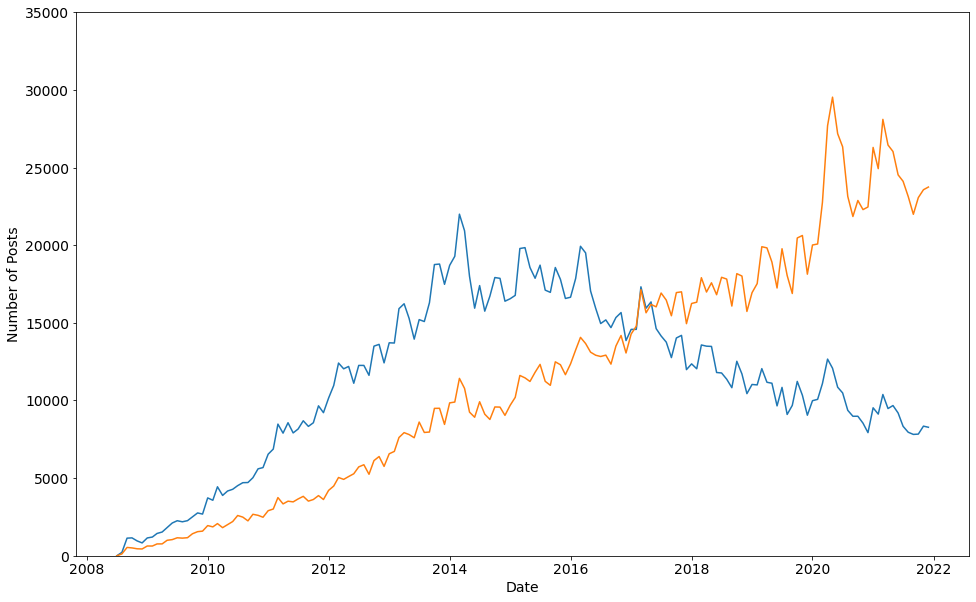

In [ ]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

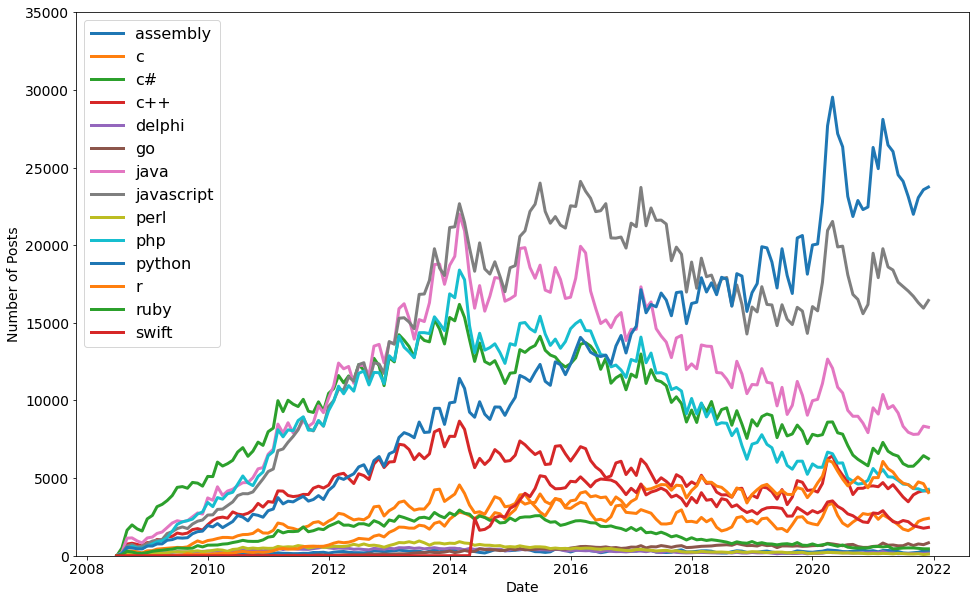

In [ ]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

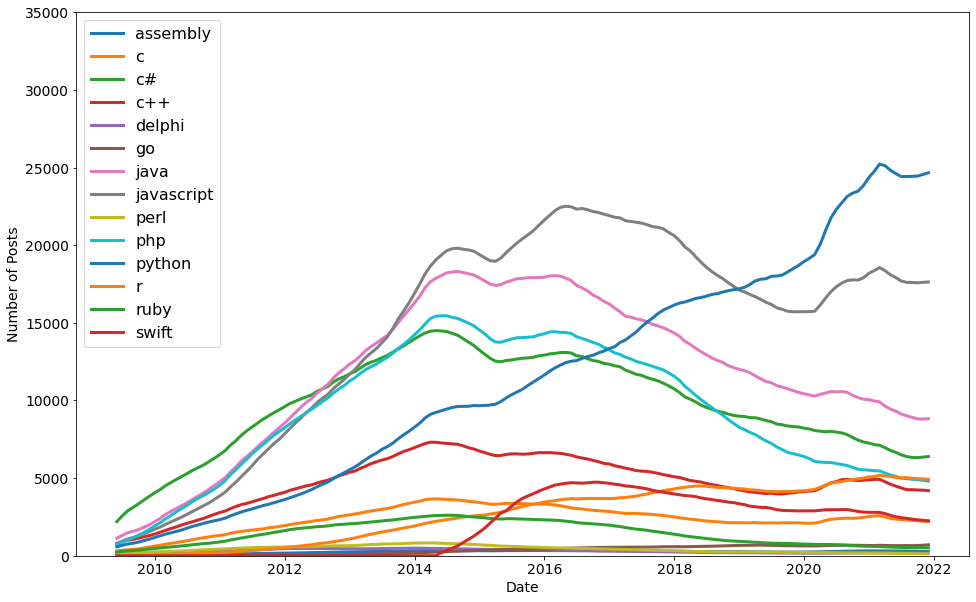

In [ ]:
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)